In [1]:
import numpy as np
from skimage.transform import resize
from skimage.io import imread, imsave, imread_collection
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
imgs = imread_collection('../data/icons/*.png')

def to_binary(img):
    return (img[:, :, 3] > 0).astype(np.uint8) * 255

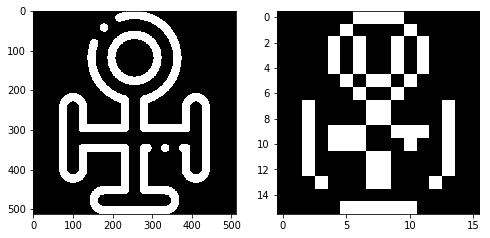

In [3]:
i = 10
target_size = (16, 16)

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(to_binary(imgs[i]), cmap='gray')
plt.subplot(122)
plt.imshow(to_binary(resize(imgs[i], target_size, mode='constant')), cmap='gray');

In [4]:
import os

for img, filename in zip(imgs, imgs.files):
    result = to_binary(resize(img, target_size, mode='constant'))
    imsave('../data/icons-resized/' + os.path.basename(filename), result)

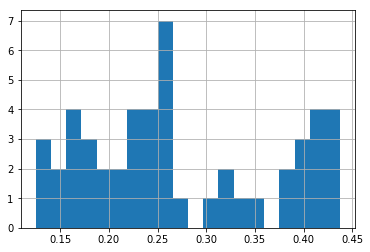

In [5]:
resized = [to_binary(resize(img, target_size, mode='constant')) for img in imgs]
num_whites = [(x > 0).sum() / x.size for x in resized]

plt.hist(num_whites, bins=20);
plt.grid()